<h1 align="center">Exploratory Data Analysis - Terrorism</h1>

<h2>To be submited to TSF</h2>

<ul>
    <li><h5>Names:</h5> <h2>Felix Hirwa Nshuti</h2></li>
    <li><h5>Track:</h5> <h3>Data Science and Business Analytics</h3></li>
    <li><h5>Task: </h5> <h3>4</h3></li>
    <li><h5>Data Source:</h5><h3><a href="https://bit.ly/2TK5Xn5" target="_blank">https://bit.ly/2TK5Xn5</a></h3></li>
    </ul>

<h1>Purpose</h1>
<h3>
 <ol>
    <li>As a Security Analyst Try to find the hot zone of Terrorism</li>
    <li>What all security issues and insights you can derive by EDA? </li>
 </ol>
</h3>

<h2>Table of Contents</h2>
<p>In this project,I will explore the weakness of the Store reffering to sales and Profits.</p>
<ul>
  

<li><a href="#Preparation">Data Processing</a></li>
<li><a href="#exploration">Data Exploration</li>
<li><a href="#con">Conclusion</a></li>

</ul>

Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

<h2 id="Preparation"> Data Processing and Cleaning</h2>

<p>Using pandas to load the dataset</p>

In [2]:
data=pd.read_csv("terorism.csv",encoding="ISO-8859-1")
print("Dataset loaded Successfully")
data.head()

Dataset loaded Successfully


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


<p>We are going to perform the data preprocessing for better understanding of the features</p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
#Renaming the columns names for a better data exploration
data.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"CountryName",
                   "provstate":"State","region_txt":"Region","attacktype1_txt":"AttackType",
                   "target1":"Target","nkill":"Killed","nwound":"Wounded","summary":"Summary",
                   "gname":"Group","targtype1_txt":"Target_type","weaptype1_txt":"Weapon",
                   "motive":"Motive","city":"City","latitude":"Latitude","longitude":"Longitude"},inplace=True)
data.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,CountryName,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
#Checking null variables
data.isnull().sum()

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [6]:
#Droping Null variables
data.dropna(axis=1 ,how="all")
data.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,CountryName,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
#Getting the necessary columns for our exploration
df = data[["Year","Month","extended","Day","CountryName","State","Region","City","Latitude","Longitude",
                 "AttackType","Killed","Wounded","Target","Summary","Group","Target_type","Weapon","Motive"]]
df.head()

,Year,Month,extended,Day,CountryName,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


Plotting the Heatmap

Text(0.5, 1.0, 'Heatmap for Correllation')

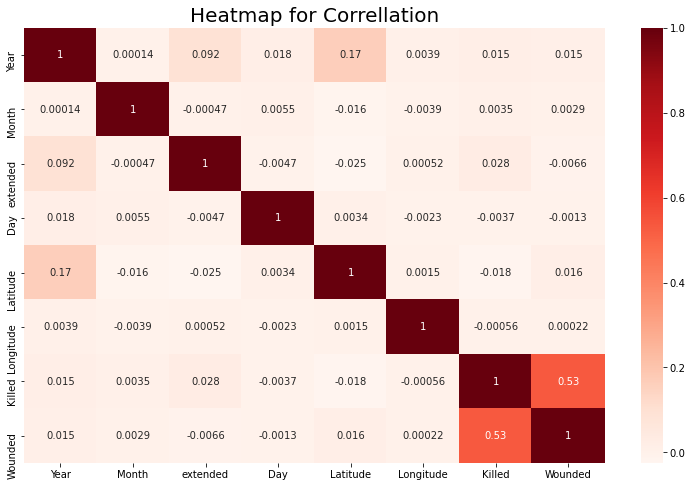

In [8]:
corr_matrix=df.corr()
plt.figure(figsize=(13,8))
sns.heatmap(corr_matrix,annot=True,cmap="Reds")
plt.title("Heatmap for Correllation", fontsize=20)

<h2 id="exploration">Dataset Exploration</h2>

#### Function to plot the charts

In [9]:
def print_chart(x,y,title,x_label,y_label):
    plt.figure(figsize=(10,5))
    sns.barplot(x,y, palette="mako")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation= 90)
    plt.show()

Showing the top country with High criminal rates

In [10]:
top_country=df["CountryName"].value_counts()[:10]
print("The top countries of criminals\n",top_country)

The top countries of criminals
 Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: CountryName, dtype: int64


Bar Chart for hotest countries

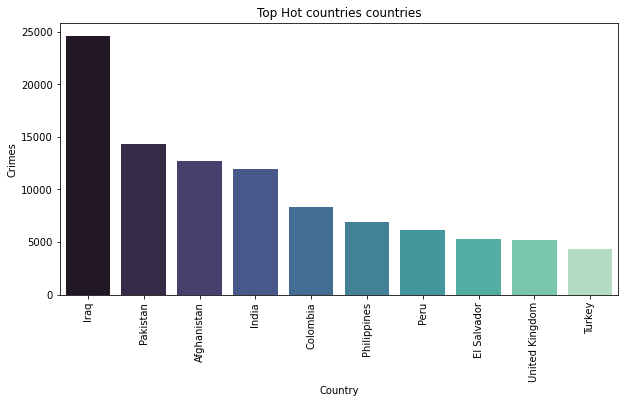

In [11]:
#Gating the chart variables
x=top_country.index
y=top_country.values
print_chart(x,y,title="Top Hot countries countries",x_label="Country",y_label="Crimes")

## Here we can see that Iraq is the hotest country with Terorism

### Let's try to exploreTop hotest States

In [12]:
hot_states=df["State"].value_counts()[:10]
print("The top States of criminals\n",hot_states)

The top States of criminals
 Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64


Chart of hotest states

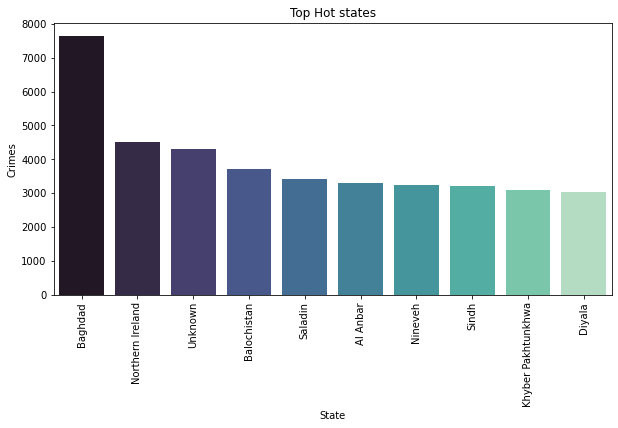

In [13]:
#Getting the chart variables
x=hot_states.index
y=hot_states.values
#ploting the chart
print_chart(x,y,title="Top Hot states",x_label="State",y_label="Crimes")

## Here Bagdad is leading the list of worst states

### Hotest Regions Explorartion

In [14]:
#getting the Hottest Regions
hot_regions=df["Region"].value_counts()[:10]
print("The top regions of criminals\n",hot_regions)

The top regions of criminals
 Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64


Chart for Hot Regions

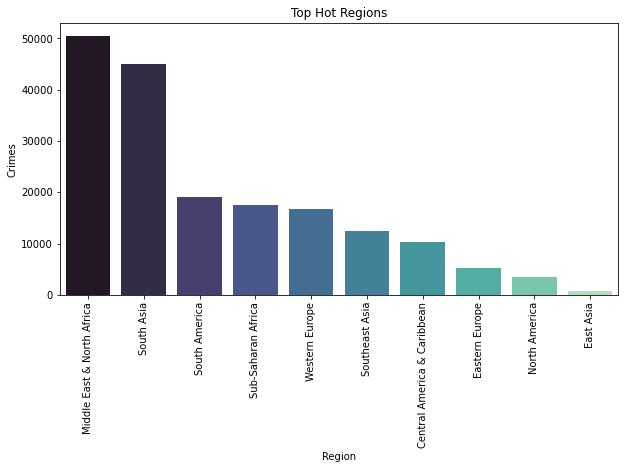

In [15]:
#Making chart variables
x=hot_regions.index
y=hot_regions.values
#ploting the chart
print_chart(x,y,title="Top Hot Regions",x_label="Region",y_label="Crimes")

### Here the Middle East & North Africa are leading the list of most terorism regions

## Seeing the to hit years

In [16]:
#getting the top hit years
hot_year=df["Year"].value_counts()[:10]
print("The top hit Years\n",hot_year)

The top hit Years
 2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64


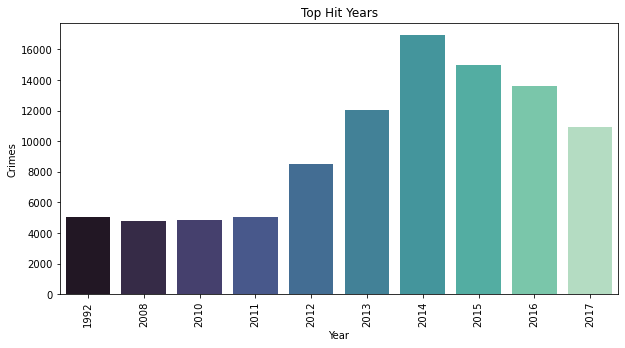

In [17]:
#Making chart variables
x=hot_year.index
y=hot_year.values
#ploting the chart
print_chart(x,y,title="Top Hit Years",x_label="Year",y_label="Crimes")

### 2014 is the year of most crimes

Most attack types used

In [18]:
#getting the most attacks used
most_att=df["AttackType"].value_counts()[:10]
print("The most atatacks are\n",most_att)

The most atatacks are
 Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64


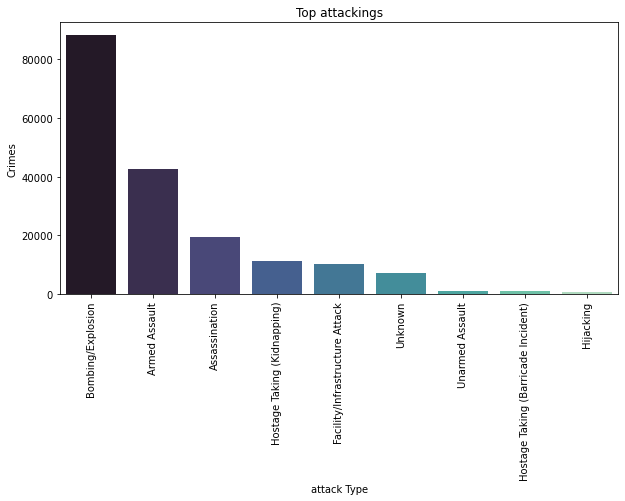

In [19]:
#Making chart variables
x=most_att.index
y=most_att.values
#ploting the chart
print_chart(x,y,title="Top attackings",x_label="attack Type",y_label="Crimes")

### Bombing and Explosion are most appeared attack types

Most Used weapons

In [20]:
#getting the most attacks used
most_weap=df["Weapon"].value_counts()[:10]
print("The most Weapons are\n",most_weap)

The most Weapons are
 Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: Weapon, dtype: int64


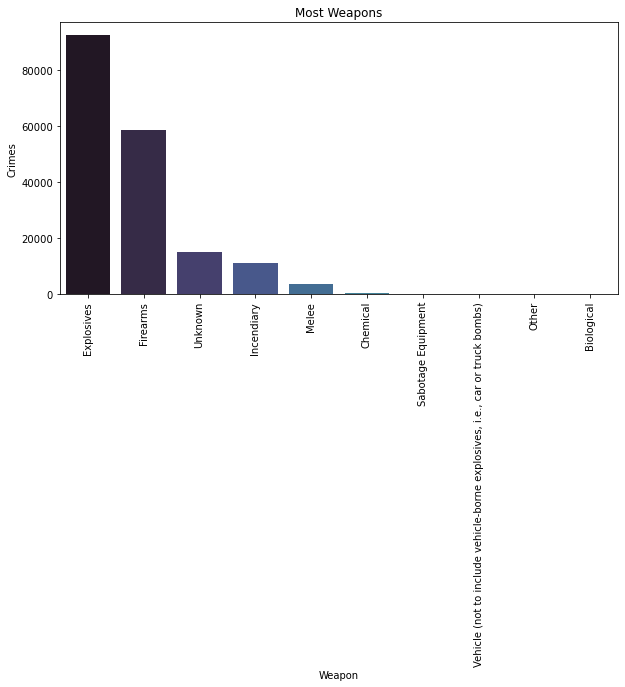

In [21]:
#Making chart variables
x=most_weap.index
y=most_weap.values
#ploting the chart
print_chart(x,y,title="Most Weapons",x_label="Weapon",y_label="Crimes")

### As we saw Early the Bombing was on top of attack and also Explosives were most used for the crimes

<h5>Top hit Groups for commiting crimes </h5>
<p>Here we can say before visualizing that it has to b from Iraq as we 
had many terorism acts in Iraq let's see the results</p>

In [22]:
#getting the most attacks used
top_group=df["Group"].value_counts()[:10]
print("The bets groups at crimes are: \n",top_group)

The bets groups at crimes are: 
 Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64


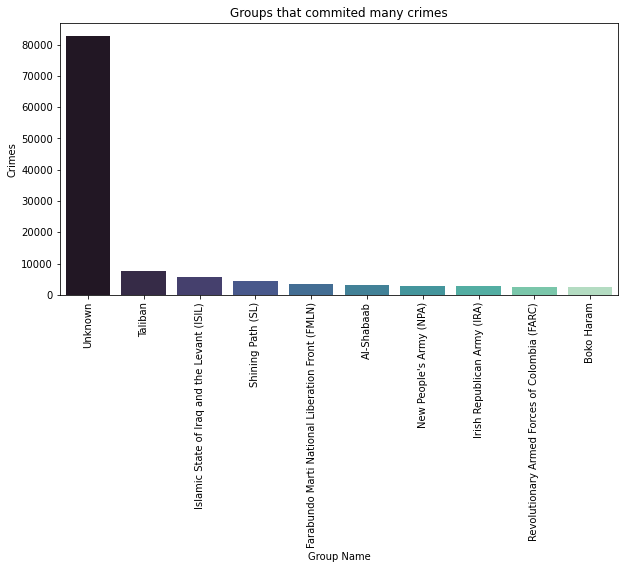

In [23]:
#Making chart variables
x=top_group.index
y=top_group.values
#ploting the chart
print_chart(x,y,title="Groups that commited many crimes",x_label="Group Name",y_label="Crimes")

### Talibans are leading and they are from Iraq

<p>Let's see how the killed are compared to those wounded</p>

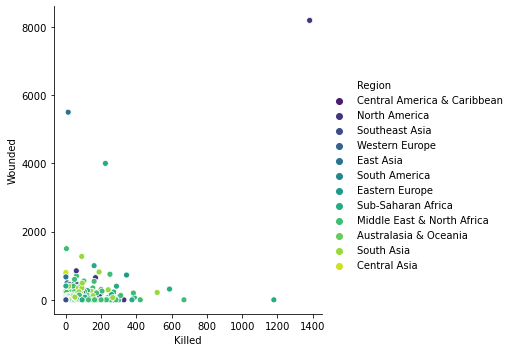

In [24]:
sns.relplot(x="Killed", y="Wounded",  ci="sd", hue='Region',palette="viridis",data=df)
plt.show()

<h2 id="conc">Conclusion</h2>

<p>We can conclude with these insight</p>
<ul>
<li>Region with high terrorism: <strong>Middle East & North Africa</strong></li>
    <li>Country with high terrorism: <strong>Iraq</strong></li>
<li>State with high terrorism: <strong>Bagdad</strong></li>
<li>The most hitting year: <strong>2014</strong></li>
<li>The most Attacking types: <strong>Bombing and Explosion</strong></li>
<li>Most used Weapons: <strong>Explosives</strong></li>
<li>Top hit group: <strong>Talibans</strong></li>
    
        


## Your Feedback are Welcome.

### Thank you !!!

## Author

<h3>Felix Hirwa Nshuri</h3>

<ul>
    <li><a href="https://www.linkedin.com/in/hirwa-nshuti/" target="_blank">LinkedIn Profile</a></li>
    <li><a href="https://github.com/hirwa-nshuti" target="_blank">Github Profile</a></li>
</ul>

## Done at
     2021-02-11        

## <h3 align="center"> The Sparks Foundation Internship <h3/>

